In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
%matplotlib inline

In [85]:
#https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
data = pd.read_csv('data.csv');
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [87]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data=data.drop(["id","Unnamed: 32"],axis=1)

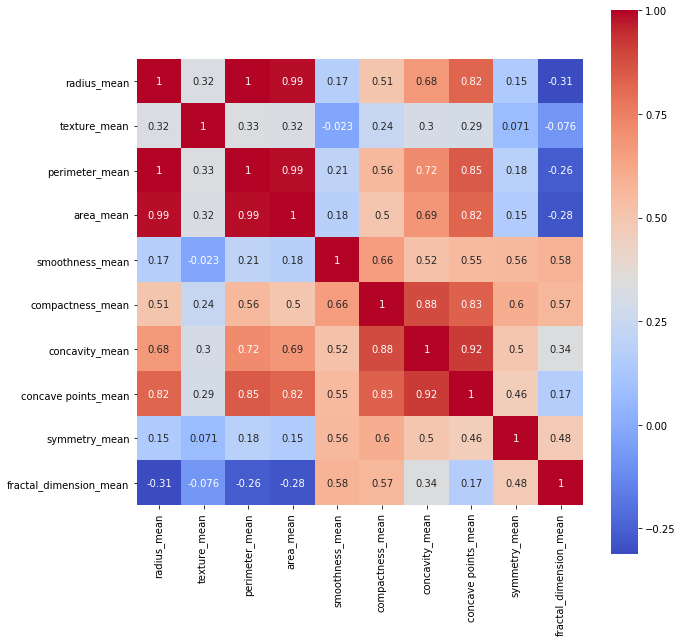

In [69]:
features_mean= list(data.columns[1:11])
plt.figure(figsize=(10,10))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [73]:
def mapping(data,feature):
    featureMap=dict()
    count=0
    for i in sorted(data[feature].unique(),reverse=True):
        featureMap[i]=count
        count=count+1
    data[feature]=data[feature].map(featureMap)
    return data

In [74]:
data=mapping(data,"diagnosis")
print(data)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            0       17.990         10.38          122.80     1001.0   
1            0       20.570         17.77          132.90     1326.0   
2            0       19.690         21.25          130.00     1203.0   
3            0       11.420         20.38           77.58      386.1   
4            0       20.290         14.34          135.10     1297.0   
5            0       12.450         15.70           82.57      477.1   
6            0       18.250         19.98          119.60     1040.0   
7            0       13.710         20.83           90.20      577.9   
8            0       13.000         21.82           87.50      519.8   
9            0       12.460         24.04           83.97      475.9   
10           0       16.020         23.24          102.70      797.8   
11           0       15.780         17.89          103.60      781.0   
12           0       19.170         24.80          132.40     11

In [70]:
#StandardScaler

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

In [76]:
#PCA

In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [78]:
x_pca = pca.transform(scaled_data)

In [79]:
print(scaled_data.shape)
print(x_pca.shape)

(569, 31)
(569, 2)


Text(0, 0.5, 'PCA2')

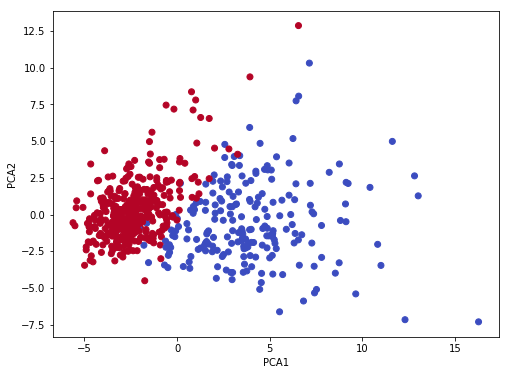

In [80]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='coolwarm')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

In [81]:
pca.components_


array([[-0.21691695,  0.21639914,  0.10359936,  0.2245478 ,  0.21796464,
         0.13764549,  0.23150388,  0.25122179,  0.2552664 ,  0.1330126 ,
         0.05797189,  0.20090409,  0.01547414,  0.20563036,  0.19798194,
         0.01123624,  0.1619218 ,  0.14578435,  0.1762679 ,  0.03832541,
         0.09508414,  0.22558983,  0.10501867,  0.23364163,  0.22196962,
         0.12530106,  0.20447639,  0.22307483,  0.24628844,  0.12066328,
         0.12672101],
       [ 0.07760994, -0.22654473, -0.05826196, -0.20762951, -0.22322434,
         0.18876038,  0.15847307,  0.06786768, -0.02722028,  0.19321967,
         0.36761956, -0.09715581,  0.09118826, -0.08069084, -0.14355563,
         0.20531469,  0.23886735,  0.203226  ,  0.13704859,  0.1860032 ,
         0.28433173, -0.21289639, -0.04513536, -0.19259202, -0.21188718,
         0.17247591,  0.14766283,  0.10308807, -0.00243309,  0.14206245,
         0.27644912]])